# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [294]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [295]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [296]:
# Rename columns
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'TOTAL_ENROLL',
    'ENROLL':'TOTAL_ENROLL_EST'
    },
    axis=1,inplace=True)

# I chose to focus on Grade 8 Math Scores, so I drop every year-state that does # not contain data on Grade 8 Math Scores
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

# Check number of valid values per column
print(df.notna().sum())
print(df.isna().sum())
df.head()

# I want to fill know total student enrollments, so I check examine
# the enrollment data for states with no total enrollment data
print(df[df['TOTAL_ENROLL'].isna()][['ENROLL_PREK', 'ENROLL_KINDER', 'ENROLL_PRIMARY', 'ENROLL_HS', 'TOTAL_ENROLL_EST']].notna().any())
print(df[df['TOTAL_ENROLL_EST'].isna()]['TOTAL_ENROLL'].isna().sum())

# Based on the missing Pre-K through high school and total enrollment estimate 
# data, it appears we cannot reconstruct total enrollment data. Therefore,
# I will remove rows that are missing total enrollment data
df.dropna(subset="TOTAL_ENROLL", inplace=True)
print(df.notna().sum())
print(df.isna().sum())

# We still have 528 average Grade 8 Math scores, which I believe is sufficient

PRIMARY_KEY                     602
STATE                           602
YEAR                            602
TOTAL_ENROLL_EST                397
TOTAL_REVENUE                   439
FEDERAL_REVENUE                 439
STATE_REVENUE                   439
LOCAL_REVENUE                   439
TOTAL_EXPENDITURE               439
INSTRUCTION_EXPENDITURE         439
SUPPORT_SERVICES_EXPENDITURE    439
OTHER_EXPENDITURE               397
CAPITAL_OUTLAY_EXPENDITURE      439
ENROLL_PREK                     518
ENROLL_KINDER                   528
ENROLL_4                        528
ENROLL_8                        528
ENROLL_12                       528
ENROLL_PRIMARY                  397
ENROLL_HS                       448
TOTAL_ENROLL                    528
AVG_MATH_4_SCORE                564
AVG_MATH_8_SCORE                602
AVG_READING_4_SCORE             521
AVG_READING_8_SCORE             478
dtype: int64
PRIMARY_KEY                       0
STATE                             0
YEAR           

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [297]:
# @@@ 1
# Your Code
df["YEAR"].nunique()

11

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [298]:
# @@@ 2
print(df[df["STATE"] == "MICHIGAN"]["AVG_MATH_8_SCORE"].mean())
print(df[df["STATE"] == "OHIO"]["AVG_MATH_8_SCORE"].mean())

# Ohio has a higher average Grade 8 Math Score than Michigan

275.8181818181818
281.90909090909093


Find the average for your chosen test across all states in 2019

In [299]:
# @@@ 3
df["AVG_MATH_8_SCORE"].mean()

277.85795454545456

For each state, find a maximum value for your chosen test score

In [300]:
# @@@ 4
states = df.groupby("STATE")
states["AVG_MATH_8_SCORE"].max()


STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    266.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             271.0
MISSOURI                286.0
MONTANA                 293.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_MEXICO              274.0
NEW_YORK                283.0
NORT

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [301]:
# @@@ 5

# Create SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT feature
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['TOTAL_ENROLL']

# Create INSTRUCTION_EXPENDITURE_PER_STUDENT feature
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_ENROLL']

# Create AVG_MATH_4_READING_4_DIFFERENCE feature
df['AVG_MATH_4_READING_4_DIFFERENCE'] = df['AVG_MATH_4_SCORE'] - df['AVG_READING_4_SCORE']

Feature engineering justification:

**SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT:**
I want to measure whether a state's support services expenditure per year is correlated with increased average Grade 8 Math scores. I want to create this feature to determine if this correlation is present. I think that increased per-capita support services expenditures could increase average Grade 8 Math scores because it may help disadvanteged students perform better on Grade 8 Math tests. 

**INSTRUCTION_EXPENDITURE_PER_STUDENT:**
I think that increased instruction expenditure could improve the quality of instruction and therefore students' average Grade 8 Math scores. To determine whether there is a correlation between increased per-capita instruction expenditure and Grade 8 Math scores, I will create this feature to measure per-capita instruction expenditure.

**AVG_MATH_4_READING_4_DIFFERENCE:**
This feature measures the difference between average Grade 4 Math scores and Grade 4 Reading scores, where a positive value indicates higher average Grade 4 Math scores than average Grade 4 Reading scores. I created this feature because I want to measure if the average gap in ability between math and reading in Grade 4 affects average Grade 8 math scores.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Average Grade 8 Math Score')

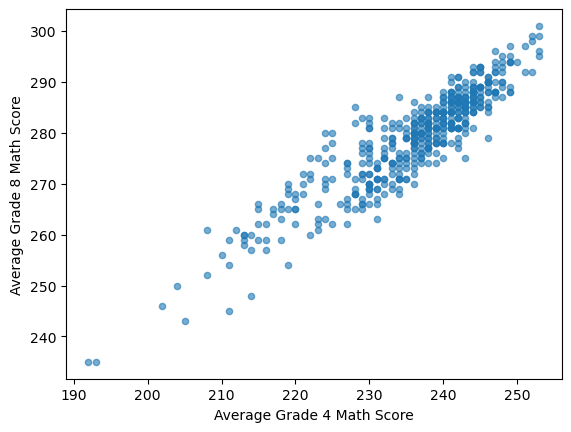

In [302]:
# @@@ 6
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Average Grade 4 Math Score')
plt.ylabel('Average Grade 8 Math Score')

There appears to be a strong, positive, linear association between Average Grade 4 Math Scores and Average Grade 8 Math Scores. There do not appear to be any outliers. There also appears to be a dense group of data points with Average Grade 4 Math Scores between scores of 230 and scores of 245. Average Grade 4 Math Scores could be a good predictor of Average Grade 8 Math scores.

**Visualization 2**

Text(0, 0.5, 'Average Grade 8 Math Score')

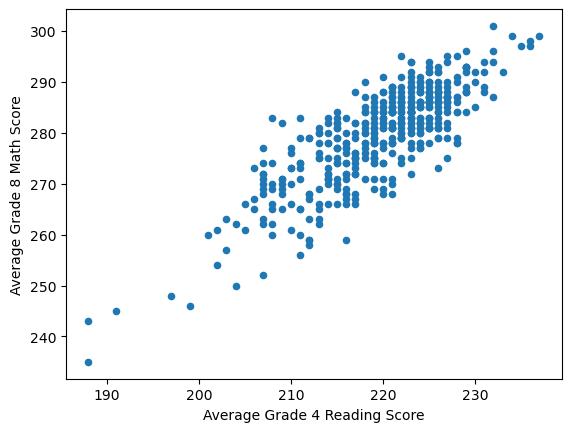

In [303]:
# @@@ 7
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_8_SCORE')
plt.xlabel('Average Grade 4 Reading Score')
plt.ylabel('Average Grade 8 Math Score')

There appears to be a moderately strong, positive, linear correlation between Average Grade 4 Reading scores and Average Grade 8 Math scores. There do not appear to be any outliers. Average Grade 4 Reading scores appear to be a good indicator of Average Grade 8 Math scores, although less so than Average Grade 4 Reading scores.

KeyError: 'AVG_MATH_8_SCORES'

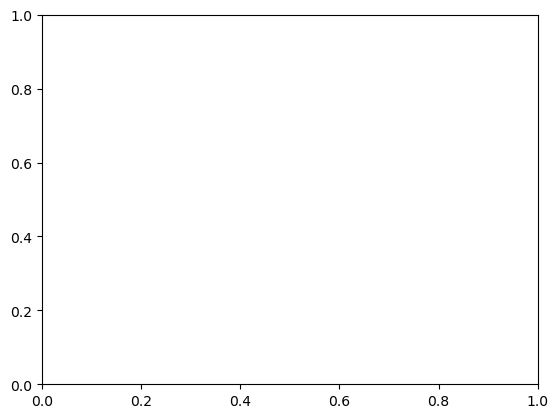

In [304]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORES')
plt.xlabel('Instruction Expenditure Per Student')
plt.ylabel('Average Grade 8 Math Scores')

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
# @@@ 8

# X =
# y = 

In [215]:
# @@@ 9 

# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [216]:
# @@@ 10
# import your sklearn class here


In [217]:
# @@@ 11
# create your model here
# model = 

In [218]:
model.fit(X_train, y_train)

NameError: name 'model' is not defined

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
# @@@ 12


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
# @@@ 13

# col_name = 'COLUMN NAME OF ONE PREDICTOR'


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")

In [ ]:
# @@@ 14


# col_name = 'COLUMN NAME OF ONE PREDICTOR"


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")